MNIST Handwritten Digit Classification Dataset

MNIST Handwritten Digit Classification Dataset
The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.

It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

It is a widely used and deeply understood dataset and, for the most part, is “solved.” Top-performing models are deep learning convolutional neural networks that achieve a classification accuracy of above 99%, with an error rate between 0.4 %and 0.2% on the hold out test dataset.

The example below loads the MNIST dataset using the Keras API and creates a plot of the first nine images in the training dataset.

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


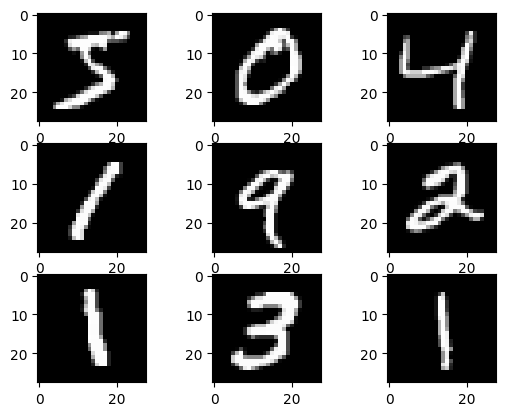

In [ ]:
# example of loading the mnist dataset
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

Running the example loads the MNIST train and test dataset and prints their shape.

We can see that there are 60,000 examples in the training dataset and 10,000 in the test dataset and that images are indeed square with 28×28 pixels.

In [ ]:
# Train: X=(60000, 28, 28), y=(60000,)
# Test: X=(10000, 28, 28), y=(10000,)

Model Evaluation Methodology
Although the MNIST dataset is effectively solved, it can be a useful starting point for developing and practicing a methodology for solving image classification tasks using convolutional neural networks.

Instead of reviewing the literature on well-performing models on the dataset, we can develop a new model from scratch.

The dataset already has a well-defined train and test dataset that we can use.

In order to estimate the performance of a model for a given training run, we can further split the training set into a train and validation dataset. Performance on the train and validation dataset over each run can then be plotted to provide learning curves and insight into how well a model is learning the problem.

The Keras API supports this by specifying the “validation_data” argument to the model.fit() function when training the model, that will, in turn, return an object that describes model performance for the chosen loss and metrics on each training epoch.

In [ ]:
from tensorflow.keras.models import Sequential  # Import the Sequential class
from tensorflow.keras.layers import Dense       # Import the Dense Layer

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In order to estimate the performance of a model on the problem in general, we can use k-fold cross-validation, perhaps five-fold cross-validation. This will give some account of the models variance with both respect to differences in the training and test datasets, and in terms of the stochastic nature of the learning algorithm. The performance of a model can be taken as the mean performance across k-folds, given the standard deviation, that could be used to estimate a confidence interval if desired.

We can use the KFold class from the scikit-learn API to implement the k-fold cross-validation evaluation of a given neural network model. There are many ways to achieve this, although we can choose a flexible approach where the KFold class is only used to specify the row indexes used for each spit.

In [ ]:
train_raw = pd.read_csv('/content/train.csv')
test_raw = pd.read_csv('/content/train.csv')
submission_raw = pd.read_csv('/content/sample_submission.csv')


# Print the shapes of the datasets
print(f'The shapes of the datasets are as follows:\n\
train_raw: {train_raw.shape}\ntest_raw: {test_raw.shape}\nsubmission_raw: {submission_raw.shape}')



The shapes of the datasets are as follows:
train_raw: (8597, 785)
test_raw: (9170, 785)
submission_raw: (28000, 2)


In [ ]:
train_raw.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_raw.head(3)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 640x480 with 0 Axes>

<Figure size 100x300 with 0 Axes>

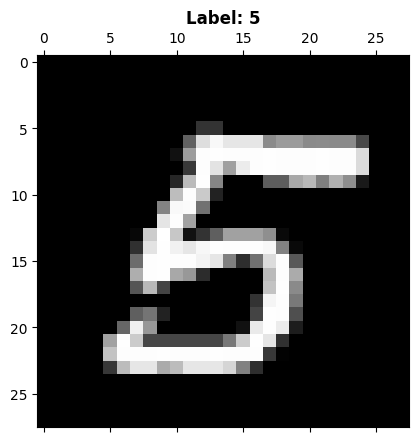

<Figure size 100x300 with 0 Axes>

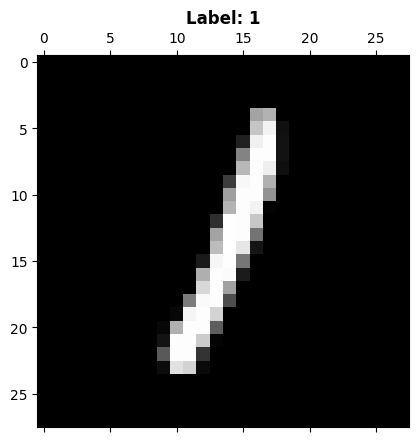

In [ ]:
import random
indices = [random.randrange(0, train_raw.shape[0]) for i in range(2)]

elements = train_raw.drop('label', axis=1)
plt.gray()
for n in indices:
    plt.figure(figsize=(1,3))
    plt.matshow(np.array(elements)[n].reshape(28,28))
    plt.title('Label: {}'.format(train_raw.label[n]), weight='bold')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = train_raw.drop('label', axis=1)/255 # Normalize the pixels by dividing by 255
X = X.values.reshape(-1, 28, 28, 1) # Reshape into 28x28

y = train_raw.label

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=77)
[d.shape for d in [X_train, X_valid, y_train, y_valid]]

[(6877, 28, 28, 1), (1720, 28, 28, 1), (6877,), (1720,)]

In [ ]:
!pip install tensorflow
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.AveragePooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(24, (3, 3), padding='same', activation='relu'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 average_pooling2d (Average  (None, 7, 7, 64)          0         
 Pooling2D)                                                      
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 32)         

In [ ]:
!pip install tensorflow
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.AveragePooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(24, (3, 3), padding='same', activation='relu'))

model.summary()

# Flattening layer
model.add(tf.keras.layers.Flatten()) # Use tf.keras.layers.Flatten()
# Fully connected layers
model.add(tf.keras.layers.Dropout(0.2, input_shape=(60,))) # Use tf.keras.layers.Dropout()
model.add(tf.keras.layers.Dense(48, activation='relu'))  # Use tf.keras.layers.Dense()
model.add(tf.keras.layers.Dense(32, activation='relu'))  # Use tf.keras.layers.Dense()
model.add(tf.keras.layers.Dense(10))                     # Use tf.keras.layers.Dense()
# model.add(layers.Dense(10, activation='softmax'))


model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 average_pooling2d_1 (Avera  (None, 7, 7, 64)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 3, 3, 32)         

In [ ]:
# Import the necessary module
from tensorflow.keras import callbacks

# Define the early stopping
early_stopping = callbacks.EarlyStopping(monitor = 'accuracy',
                                         min_delta=0.01, # minimium amount of change to count as an improvement
                                         patience=10, # how many epochs to wait before stopping
                                         restore_best_weights=True,
                                         mode='max'
                                        )

In [ ]:
# Compile the model
from tensorflow import keras
model.compile(
    optimizer='Adam',
    metrics = ['accuracy'],
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    )

Epoch 1/10
172/172 [==============================] - 20s 75ms/step - loss: nan - accuracy: 0.1849 - val_loss: nan - val_accuracy: 0.0908
Epoch 2/10
172/172 [==============================] - 7s 42ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.0908
Epoch 3/10
172/172 [==============================] - 10s 57ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.0908
Epoch 4/10
172/172 [==============================] - 9s 52ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.0908
Epoch 5/10
172/172 [==============================] - 8s 46ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.0908
Epoch 6/10
172/172 [==============================] - 9s 51ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.0908
Epoch 7/10
172/172 [==============================] - 7s 41ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.0908
Epoch 8/10
172/172 [===================

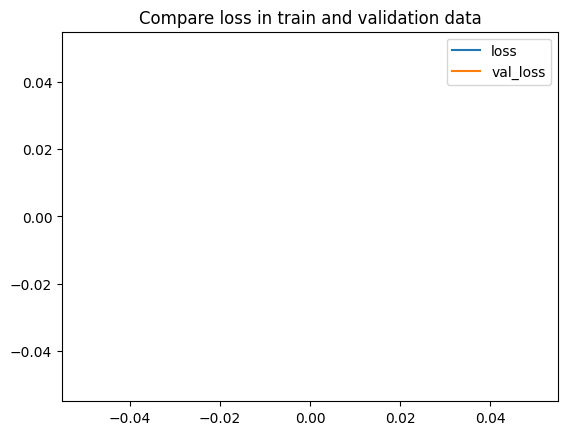

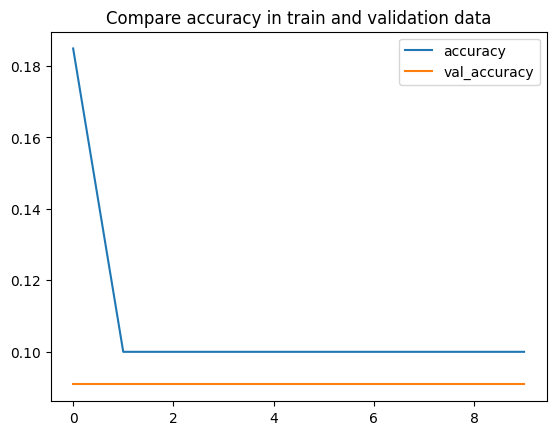

In [ ]:
# Assuming 'X_train' and 'y_train' are your training data and labels
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping])  # Train the model and store history

# History datafreme
history_df = pd.DataFrame(history.history)

# Plot the histories (train vs validation)
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.title('Compare loss in train and validation data')
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.title('Compare accuracy in train and validation data')
plt.show()

In [ ]:
evaluation = model.evaluate(X_valid, y_valid)
evaluation

54/54 [==============================] - 2s 25ms/step - loss: nan - accuracy: 0.1047


[nan, 0.10465116053819656]

In [ ]:
pred_valid = np.argmax(model.predict(X_valid), axis=1)
pred_valid

54/54 [==============================] - 1s 19ms/step


array([0, 0, 0, ..., 0, 0, 0])

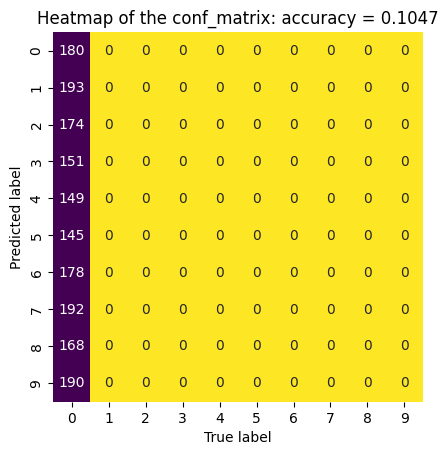

In [ ]:
# Get the confusion matrix
from sklearn.metrics import confusion_matrix # Import the confusion_matrix function
import seaborn as sns # Import Seaborn for plotting
conf_mat = confusion_matrix(y_true = y_valid, y_pred = pred_valid)
conf_mat

cmap=plt.cm.viridis_r
# Plot the hatmap of the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=cmap, vmax=1, cbar=False, square=True)
plt.title('Heatmap of the conf_matrix: accuracy = {:.4f}'.format(evaluation[1]))
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [ ]:
# Assuming 'preds' needs to be padded to match the length of 'submission_raw'
import numpy as np

# Pad 'preds' with a default value (e.g., -1) to match the length of 'sub_file'
preds_padded = np.pad(preds, (0, len(sub_file) - len(preds)), 'constant', constant_values=-1)

sub_file = submission_raw.copy(deep=False)
sub_file['Label'] = preds_padded  # Assign the padded predictions

sub_file

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,-1
27996,27997,-1
27997,27998,-1
27998,27999,-1


In [ ]:
sub_file.to_csv('submission.csv', index = None)
print('The file is ready for submission')


The file is ready for submission
